In [ ]:
# Following is a Project in Data Analysis using Pandas. 
# My main questions for this project are, "How does number of packs smoked, smoking, age and other medical issues affect COPD, and how often do comorbities exist?" 
# I am using three datasets from Kaggle, including dataset.csv, to extract data to support my findings. I have merged my 3 datasets into one main dataset. 
# NOTE: due to time constraints, there are still analyses to be done after this project is submitted. This is an ongoing project.  

In [ ]:
# Import my pandas library modules and submodule pyplot that contain the features, benefits and applications needed for this project. 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
# DATASET 1

In [ ]:
# Import my first COPD dataset from Kaggle.
# First downloaded the zip file to my project folder. 
# Then unzipped with file with Zip Extractor Pro - Free.
# Once unzipped, loaded the file to create my first dataset 'copd_dataset1.

copd_dataset1 = pd.read_csv('dataset.csv')

In [ ]:
# Display the first 10 rows of the dataset to see the column names and get an idea of the data in the columns.
copd_dataset1.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60,SEVERE,120,120,120,1,36,...,70,4,3,1,2,1,0,0,1,0
1,2,57,79,50,MODERATE,165,176,176,1,56,...,44,4,2,0,2,1,0,0,1,1
2,3,62,80,11,MODERATE,201,180,201,2,68,...,44,4,2,0,2,1,0,0,1,0
3,4,145,56,60,VERY SEVERE,210,210,210,0,14,...,62,1,4,1,2,0,0,1,1,0
4,5,136,65,68,SEVERE,204,210,210,1,42,...,76,1,3,1,2,0,1,1,0,0
5,6,84,67,26,MODERATE,216,180,216,1,50,...,74,2,2,0,1,1,0,0,1,0
6,7,93,67,50,SEVERE,214,237,237,1,35,...,77,2,3,0,1,1,0,0,1,0
7,8,27,83,90,SEVERE,214,237,237,1,32,...,45,4,3,1,2,1,0,0,1,0
8,9,114,72,50,MODERATE,231,237,237,2,63,...,70,3,2,1,1,1,0,0,1,0
9,10,152,75,6,SEVERE,226,240,240,1,46,...,56,3,3,0,2,0,1,0,0,0


In [ ]:
# Displaying the size of the data set and data types of the data in each column.
# This was used for troubleshooting. Found the steps/suggestion on Stock Overflow.

copd_dataset1_shape = copd_dataset1.shape
print(f'The Dataframe has {copd_dataset1_shape[0]} rows and {copd_dataset1_shape[1]} columns! \n')
print(copd_dataset1.info())

The Dataframe has 101 rows and 24 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null  

In [ ]:
# Test for missing values in the dataset.  
# Since it returned as True, I know I have missing values I need to deal with. 

print(copd_dataset1.isnull().any().any())

True


In [ ]:
# Check for empty cells (isnull) = true.
# Most of the fields show false. Opened the truncated result in a data editor to look closer. 
# This also lets me know there 101 rows and 24 columns. 

print(copd_dataset1.isnull().sum)

<bound method DataFrame.sum of      Unnamed: 0     ID    AGE  PackHistory  COPDSEVERITY   MWT1   MWT2  \
0         False  False  False        False         False  False  False   
1         False  False  False        False         False  False  False   
2         False  False  False        False         False  False  False   
3         False  False  False        False         False  False  False   
4         False  False  False        False         False  False  False   
..          ...    ...    ...          ...           ...    ...    ...   
96        False  False  False        False         False  False  False   
97        False  False  False        False         False  False  False   
98        False  False  False        False         False  False  False   
99        False  False  False        False         False  False  False   
100       False  False  False        False         False   True   True   

     MWT1Best   FEV1  FEV1PRED  ...   SGRQ  AGEquartiles   copd  gender  \
0    

In [ ]:
# Get column names for preparation to drop unnecessary columns.
copd_dataset1.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [ ]:
# Define my program to clean my dataset.
# Clean dataset with the function by dropping unnecessary columns and running dropna() to remove any rows containing null or NaN values. 
# Return the cleaned value for copd_dataset1
# Printed out dataset1 to make sure everything went as planned and see that now there are 99 rows adn 24 columns.  

def clean_cd(copd_dataset1):

   # Drop unnecessary columns that will not be needed in my analysis.
   cols_to_drop = ['MWT1','MWT2','FEV1', 'FEV1PRED', 'FVC','FVCPRED','AGEquartiles','CAT', 'HAD', 'SGRQ', 'gender','Diabetes','hypertension','muscular','AtrialFib']
   copd_dataset1 = copd_dataset1.drop(columns = cols_to_drop)

   #Drop rows with missing values.
   copd_dataset1 = copd_dataset1.dropna()
   return copd_dataset1

print(copd_dataset1)


    Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1  MWT2  MWT1Best  \
0            1   58   77           60       SEVERE   120   120       120   
1            2   57   79           50     MODERATE   165   176       176   
2            3   62   80           11     MODERATE   201   180       201   
3            4  145   56           60  VERY SEVERE   210   210       210   
4            5  136   65           68       SEVERE   204   210       210   
..         ...  ...  ...          ...          ...   ...   ...       ...   
94          96   12   72           30     MODERATE   558   563       558   
95          97   10   68           25         MILD   511   575       575   
96          98   43   75           40         MILD   576   577       577   
97          99   74   68           30     MODERATE   468   582       582   
98         100  108   54           30       SEVERE   688   699       699   

    FEV1  FEV1PRED  ...  SGRQ  AGEquartiles  copd  gender  smoking  Diabetes  \
0      

In [ ]:
# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.

copd_dataset1_cleaned = clean_cd(copd_dataset1)
copd_dataset1_cleaned.head(10)


,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD
0,1,58,77,60,SEVERE,120,3,2,0
1,2,57,79,50,MODERATE,176,2,2,1
2,3,62,80,11,MODERATE,201,2,2,0
3,4,145,56,60,VERY SEVERE,210,4,2,0
4,5,136,65,68,SEVERE,210,3,2,0
5,6,84,67,26,MODERATE,216,2,1,0
6,7,93,67,50,SEVERE,237,3,1,0
7,8,27,83,90,SEVERE,237,3,2,0
8,9,114,72,50,MODERATE,237,2,1,0
9,10,152,75,6,SEVERE,240,3,2,0


In [ ]:
# Reset the index after null values have possibly been dropped.

copd_dataset1 = copd_dataset1.dropna().reset_index(drop=True)#

In [ ]:
# DATASET 2

In [2528]:
# Import my second COPD dataset from Kaggle.
# This csv dataset is about Patient Risk Profiles.
# First downloaded the zip file to my Project folder. 
# Then unzipped with file with Zip Extractor Pro - Free.
# Once unzipped, loaded the file to create my second dataset 'copd_dataset2'.

copd_dataset2 = pd.read_csv('patient_risk_profiles.csv')

In [2530]:
# Display the first 10 rows of the 2nd dataset to see the column names and data in the columns just to get an idea of the 
# data and how many rows.

copd_dataset2.head(10)

,personId,age group: 10 - 14,age group: 15 - 19,age group: 20 - 24,age group: 65 - 69,age group: 40 - 44,age group: 45 - 49,age group: 55 - 59,age group: 85 - 89,age group: 75 - 79,...,predicted risk of Muscle weakness or injury,predicted risk of Ankylosing Spondylitis,predicted risk of Autoimmune hepatitis,predicted risk of Multiple Sclerosis,"predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreatitis",predicted risk of Ulcerative colitis,predicted risk of Migraine,predicted risk of Dementia,predicted risk of Treatment resistant depression (TRD),"predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Test for missing values in the dataset.  
# Since it returned as False, I do not need to deal with missing values, but run a dropna() in the cleaning function in case the dataset
# is expanded in the future.  

print(copd_dataset2.isnull().any().any())

False


In [2531]:
# Check for empty cells (isnull) = true.
# Most of the fields show false. Opened the truncated result in a data editor to look closer. 
# This also lets me know there 100 rows and 100 columns. 

print(copd_dataset2.isnull().sum)

<bound method DataFrame.sum of     personId  age group:  10 -  14  age group:  15 -  19  \
0      False                 False                 False   
1      False                 False                 False   
2      False                 False                 False   
3      False                 False                 False   
4      False                 False                 False   
..       ...                   ...                   ...   
95     False                 False                 False   
96     False                 False                 False   
97     False                 False                 False   
98     False                 False                 False   
99     False                 False                 False   

    age group:  20 -  24  age group:  65 -  69  age group:  40 -  44  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False        

In [ ]:
# Get columns names to prepare to drop (keep) unnecessary columns.

copd_dataset2.columns

Index(['personId', 'age group:  10 -  14', 'age group:  15 -  19',
       'age group:  20 -  24', 'age group:  65 -  69', 'age group:  40 -  44',
       'age group:  45 -  49', 'age group:  55 -  59', 'age group:  85 -  89',
       'age group:  75 -  79', 'age group:   5 -   9', 'age group:  25 -  29',
       'age group:   0 -   4', 'age group:  70 -  74', 'age group:  50 -  54',
       'age group:  60 -  64', 'age group:  35 -  39', 'age group:  30 -  34',
       'age group:  80 -  84', 'age group:  90 -  94', 'Sex = FEMALE',
       'Sex = MALE', 'Acetaminophen exposures in prior year',
       'Occurrence of Alcoholism in prior year', 'Anemia in prior year',
       'Angina events in prior year', 'ANTIEPILEPTICS in prior year',
       'Occurrence of Anxiety in prior year', 'Osteoarthritis in prior year',
       'Aspirin exposures in prior year', 'Occurrence of Asthma in prior year',
       'Atrial Fibrillation, incident in prior year',
       'HORMONAL CONTRACEPTIVES in prior year',
  

In [ ]:
# Clean 'copd_dataset2'
# Define my program to clean my dataset.set.
def clean_cd1(copd_dataset2):

    #Drop unnessary columns that will not be needed in my analysis and keep the ones that will.
    
    columns_to_drop = ['age group:  10 -  14', 'age group:  15 -  19', 'age group:  20 -  24', 'age group:  65 -  69', 'age group:  40 -  44', 'age group:  45 -  49', 'age group:  55 -  59', 'age group:  85 -  89', 'age group:  75 -  79', 'age group:   5 -   9', 'age group:  25 -  29', 'age group:   0 -   4', 'age group:  70 -  74', 'age group:  50 -  54', 'age group:  60 -  64', 'age group:  35 -  39', 'age group:  30 -  34', 'age group:  80 -  84', 'age group:  90 -  94','Acetaminophen exposures in prior year',
       'Occurrence of Alcoholism in prior year', 'Anemia in prior year',
       'Angina events in prior year', 'ANTIEPILEPTICS in prior year',
       'Occurrence of Anxiety in prior year', 'Osteoarthritis in prior year',
       'Aspirin exposures in prior year', 'Occurrence of Asthma in prior year',
       'Atrial Fibrillation, incident in prior year',
       'HORMONAL CONTRACEPTIVES in prior year', 'Sex = FEMALE',
       'Any cancer (excl. prostate cancer and benign cancer) in prior year',
       'Acute Kidney Injury (AKI) in prior year',
       'Chronic kidney disease or end stage renal disease in prior year',
       'Major depressive disorder, with NO occurrence of certain psychiatric disorder in prior year',
       'Type 1 diabetes and no prior specific non-T1DM diabetes in prior year',
       'Type 2 Diabetes Mellitus (DM), with no type 1 or secondary DM in prior year',
       'Deep Vein Thrombosis (DVT) in prior year', 'Dyspnea in prior year',
       'Edema in prior year', 'Gastroesophageal reflux disease in prior year',
       'Acute gastrointestinal (GI) bleeding in prior year',
       'Heart valve disorder in prior year', 'Chronic hepatitis in prior year',
       'Hyperlipidemia in prior year', 'Hypertension in prior year',
       'Hypothyroidism in prior year',
       'Inflammatory Bowel Disease in prior year',
       'Low back pain in prior year', 'Occurrence of neuropathy in prior year',
       'Obesity in prior year', 'Opioids in prior year',
       'Osteoporosis in prior year',
       'Peripheral vascular disease in prior year', 'Pneumonia in prior year',
       'Psychotic disorder in prior year',
       'Acute Respiratory failure in prior year',
       'Rheumatoid Arthritis in prior year', 'Seizure in prior year',
       'Sepsis in prior year', 'Skin ulcer in prior year',
       'Sleep apnea in prior year', 'Smoking in prior year',
       'STEROIDS in prior year',
       'Hemorrhagic stroke in an inpatient setting in prior year',
       'Non-hemorrhagic Stroke in an inpatient setting in prior year',
       'Urinary tract infectious disease in prior year',
       'Antibiotics Carbapenems in prior year',
       'Antibiotics Aminoglycosides in prior year',
       'Antibiotics Cephalosporins in prior year',
       'Antibiotics Fluoroquinolones in prior year',
       'Antibiotics Glycopeptides and lipoglycopeptides in prior year',
       'Antibiotics Macrolides in prior year',
       'Antibiotics Monobactams in prior year',
       'Antibiotics Oxazolidinones in prior year',
       'Antibiotics Penicillins in prior year',
       'Antibiotics Polypeptides in prior year',
       'Antibiotics Rifamycins in prior year',
       'Antibiotics Sulfonamides in prior year',
       'Antibiotics Streptogramins in prior year',
       'Antibiotics Tetracyclines in prior year',
       'predicted risk of Pulmonary Embolism',
       'predicted risk of Sudden Hearing Loss, No congenital anomaly or middle or inner ear conditions',
       'predicted risk of Restless Leg Syndrome',
       'predicted risk of Sudden Vision Loss, with no eye pathology causes',
       'predicted risk of Muscle weakness or injury',
       'predicted risk of Ankylosing Spondylitis', 
       'predicted risk of Autoimmune hepatitis',
       'predicted risk of Multiple Sclerosis',
       'predicted risk of Acute pancreatitis, with No chronic or hereditary or common causes of pancreatitis',
       'predicted risk of Ulcerative colitis', 'predicted risk of Migraine',
       'predicted risk of Dementia',
       'predicted risk of  Treatment resistant depression (TRD)',"predicted risk of Parkinson's disease, inpatient or with 2nd diagnosis"]
   
    copd_dataset2 = copd_dataset2.drop(columns=columns_to_drop, errors = 'ignore')
    
    # Drop rows with missing values.
    copd_dataset2 = copd_dataset2.dropna()
    
    # Return the cleaned copd_dataset2
    return copd_dataset2



In [2464]:
# Rename the Sex = Male column to Sex so it can be merged the Sex Column when joined in merged_copd_dataset2
copd_dataset2 = copd_dataset2.rename(columns={'Sex = MALE':'male/female'})


In [2465]:
# Rename the personID to ID so I can join on this column with copd_dataset1
copd_dataset2 = copd_dataset2.rename(columns={'personId':'ID'})

In [2466]:
# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.
copd_dataset2_cleaned = clean_cd1(copd_dataset2)
copd_dataset2_cleaned.head(10)


,ID,male/female,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,0,0,0,0
1,2,1,0,0,0
2,3,1,0,0,1
3,4,1,1,0,0
4,5,1,0,1,0
5,6,1,0,0,1
6,7,0,1,0,0
7,8,0,0,0,0
8,9,0,0,0,0
9,10,1,0,0,0


In [2467]:
copd_dataset2_cleaned.columns

Index(['ID', 'male/female', 'Heart failure in prior year',
       'Chronic obstructive pulmonary disease (COPD) in prior year',
       'Coronary artery disease (CAD) in prior year'],
      dtype='object')

In [2468]:
print(copd_dataset2_cleaned)

     ID  male/female  Heart failure in prior year  \
0     1            0                            0   
1     2            1                            0   
2     3            1                            0   
3     4            1                            1   
4     5            1                            0   
..  ...          ...                          ...   
95   96            0                            0   
96   97            1                            0   
97   98            1                            1   
98   99            1                            0   
99  100            1                            1   

    Chronic obstructive pulmonary disease (COPD) in prior year  \
0                                                   0            
1                                                   0            
2                                                   0            
3                                                   0            
4                                

In [2469]:
print(copd_dataset2_cleaned)

     ID  male/female  Heart failure in prior year  \
0     1            0                            0   
1     2            1                            0   
2     3            1                            0   
3     4            1                            1   
4     5            1                            0   
..  ...          ...                          ...   
95   96            0                            0   
96   97            1                            0   
97   98            1                            1   
98   99            1                            0   
99  100            1                            1   

    Chronic obstructive pulmonary disease (COPD) in prior year  \
0                                                   0            
1                                                   0            
2                                                   0            
3                                                   0            
4                                

In [2470]:
# BEGIN MERGED DATASET 1 Joining copd_dataset1_cleaned with copd_dataset2 cleaned with a Left join on ID
merged_copd_dataset1 = pd.merge(copd_dataset1_cleaned, copd_dataset2_cleaned, on = 'ID', how= 'left')

In [2471]:
# Print the first 10 rows of my merged datasets to make sure the merge was successful and there are no missing columns.
merged_copd_dataset1.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,male/female,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,58,77,60,SEVERE,120,3,2,0,1,1,1,0
1,2,57,79,50,MODERATE,176,2,2,1,1,0,0,0
2,3,62,80,11,MODERATE,201,2,2,0,1,0,0,1
3,4,145,56,60,VERY SEVERE,210,4,2,0,NaN,NaN,NaN,NaN
4,5,136,65,68,SEVERE,210,3,2,0,NaN,NaN,NaN,NaN
5,6,84,67,26,MODERATE,216,2,1,0,0,0,0,0
6,7,93,67,50,SEVERE,237,3,1,0,1,1,0,0
7,8,27,83,90,SEVERE,237,3,2,0,1,0,0,0
8,9,114,72,50,MODERATE,237,2,1,0,NaN,NaN,NaN,NaN
9,10,152,75,6,SEVERE,240,3,2,0,NaN,NaN,NaN,NaN


In [2472]:
print(merged_copd_dataset1)

    Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1   58   77           60       SEVERE       120     3        2   
1            2   57   79           50     MODERATE       176     2        2   
2            3   62   80           11     MODERATE       201     2        2   
3            4  145   56           60  VERY SEVERE       210     4        2   
4            5  136   65           68       SEVERE       210     3        2   
..         ...  ...  ...          ...          ...       ...   ...      ...   
94          96   12   72           30     MODERATE       558     2        2   
95          97   10   68           25         MILD       575     1        2   
96          98   43   75           40         MILD       577     1        2   
97          99   74   68           30     MODERATE       582     2        2   
98         100  108   54           30       SEVERE       699     3        2   

    IHD  male/female  Heart failure in prior year  

In [2473]:
# Test for missing values
print(merged_copd_dataset1.isnull().any().any())

True


In [2474]:
# Check for empty cells (isnull) = true.
print(merged_copd_dataset1.isnull().sum)

<bound method DataFrame.sum of     Unnamed: 0     ID    AGE  PackHistory  COPDSEVERITY  MWT1Best   copd  \
0        False  False  False        False         False     False  False   
1        False  False  False        False         False     False  False   
2        False  False  False        False         False     False  False   
3        False  False  False        False         False     False  False   
4        False  False  False        False         False     False  False   
..         ...    ...    ...          ...           ...       ...    ...   
94       False  False  False        False         False     False  False   
95       False  False  False        False         False     False  False   
96       False  False  False        False         False     False  False   
97       False  False  False        False         False     False  False   
98       False  False  False        False         False     False  False   

    smoking    IHD  male/female  Heart failure in prior 

In [2475]:
# Make sure rows did not get dropped in my cleaning process. 
merged_copd_dataset1.shape

(99, 13)

In [2476]:
columns_with_NaN = merged_copd_dataset1.isna().any()
print(columns_with_NaN)

Unnamed: 0                                                    False
ID                                                            False
AGE                                                           False
PackHistory                                                   False
COPDSEVERITY                                                  False
MWT1Best                                                      False
copd                                                          False
smoking                                                       False
IHD                                                           False
male/female                                                    True
Heart failure in prior year                                    True
Chronic obstructive pulmonary disease (COPD) in prior year     True
Coronary artery disease (CAD) in prior year                    True
dtype: bool


In [2477]:

def clean_cd2(merged_copd_dataset1):
    
    # Drop rows with missing values.
    merged_copd_dataset1 = merged_copd_dataset1.dropna()

    # Return the cleaned merged_copd_dataset1
    return merged_copd_dataset1

print(merged_copd_dataset1)

    Unnamed: 0   ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1   58   77           60       SEVERE       120     3        2   
1            2   57   79           50     MODERATE       176     2        2   
2            3   62   80           11     MODERATE       201     2        2   
3            4  145   56           60  VERY SEVERE       210     4        2   
4            5  136   65           68       SEVERE       210     3        2   
..         ...  ...  ...          ...          ...       ...   ...      ...   
94          96   12   72           30     MODERATE       558     2        2   
95          97   10   68           25         MILD       575     1        2   
96          98   43   75           40         MILD       577     1        2   
97          99   74   68           30     MODERATE       582     2        2   
98         100  108   54           30       SEVERE       699     3        2   

    IHD  male/female  Heart failure in prior year  

In [2478]:
# call my function to clean my data, drop unnecessary rows, and print out the result to make sure the correct rows were dropped.
merged_copd_dataset1_cleaned = clean_cd2(merged_copd_dataset1)
merged_copd_dataset1_cleaned.head(10)

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,male/female,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year
0,1,58,77,60,SEVERE,120,3,2,0,1,1,1,0
1,2,57,79,50,MODERATE,176,2,2,1,1,0,0,0
2,3,62,80,11,MODERATE,201,2,2,0,1,0,0,1
5,6,84,67,26,MODERATE,216,2,1,0,0,0,0,0
6,7,93,67,50,SEVERE,237,3,1,0,1,1,0,0
7,8,27,83,90,SEVERE,237,3,2,0,1,0,0,0
12,13,49,64,30,VERY SEVERE,246,4,2,0,1,0,0,0
13,14,80,74,75,MILD,270,1,1,0,0,0,0,0
16,17,41,69,78,SEVERE,273,3,2,0,1,0,0,0
17,18,1,55,109,MODERATE,281,2,2,0,0,0,0,0


In [2479]:
merged_copd_dataset1_cleaned['male/female'].replace({'0.0' : 'female', '1.0' : 'male'}, inplace=True)

C:\Users\trish\AppData\Local\Temp\ipykernel_20588\1731775188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_copd_dataset1_cleaned['male/female'].replace({'0.0' : 'female', '1.0' : 'male'}, inplace=True)
C:\Users\trish\AppData\Local\Temp\ipykernel_20588\1731775188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_copd_datas

In [2480]:
# Make sure rows did not get dropped in my cleaning process. 
merged_copd_dataset1_cleaned.shape

(55, 13)

In [2481]:
#Trying to find where my formatting changes from float:0 to a float:2
print(merged_copd_dataset1_cleaned)

    Unnamed: 0  ID  AGE  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  \
0            1  58   77           60       SEVERE       120     3        2   
1            2  57   79           50     MODERATE       176     2        2   
2            3  62   80           11     MODERATE       201     2        2   
5            6  84   67           26     MODERATE       216     2        1   
6            7  93   67           50       SEVERE       237     3        1   
7            8  27   83           90       SEVERE       237     3        2   
12          13  49   64           30  VERY SEVERE       246     4        2   
13          14  80   74           75         MILD       270     1        1   
16          17  41   69           78       SEVERE       273     3        2   
17          18   1   55          109     MODERATE       281     2        2   
21          22  48   75           40  VERY SEVERE       297     4        1   
23          24  15   73           75       SEVERE       300     

In [2482]:
# DATASET 3 STARTS HERE

In [2483]:
# Import my third dataset from Kaggle after unzipping the dataset in my Project folder
copd_dataset3 = pd.read_csv('respiratory symptoms and treatment.csv')

In [2484]:
#Display the first 10 rows of the 3rd dataset to see the column names and data in the columns
copd_dataset3.head(10)

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4,female,Asthma,Mepolizumab,high
2,wheezing,6,male,Asthma,Mepolizumab,high
3,shortness of breath,7,male,Asthma,Mepolizumab,high
4,shortness of breath,9,male,Asthma,Mepolizumab,high
5,tight feeling in the chest,NaN,male,Asthma,Mepolizumab,high
6,shortness of breath,NaN,male,Asthma,Mepolizumab,high
7,tight feeling in the chest,8,female,Asthma,Mepolizumab,high
8,shortness of breath,36,female,Asthma,Mepolizumab,medium
9,wheezing,40,female,Asthma,Omalizumab,medium


In [2485]:
#Test for missing values.
print(copd_dataset3.isnull().any().any())

True


In [2486]:
# Check for empty cells (isnull) = true.
print(copd_dataset3.isnull().sum)

<bound method DataFrame.sum of        Symptoms    Age    Sex  Disease  Treatment  Nature
0         False  False  False    False      False   False
1         False  False  False    False      False   False
2         False  False  False    False      False   False
3         False  False  False    False      False   False
4         False  False  False    False      False   False
...         ...    ...    ...      ...        ...     ...
38532     False  False  False    False      False   False
38533     False  False  False    False      False   False
38534     False  False  False    False      False   False
38535     False  False  False    False      False   False
38536     False  False  False    False      False   False

[38537 rows x 6 columns]>


In [2487]:
#Reset the index after null values have been dropped
copd_dataset3 = copd_dataset3.dropna().reset_index(drop=True)

In [2488]:
#Get column names for preparation to drop unnecessary columns
copd_dataset3.columns

Index(['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment', 'Nature'], dtype='object')

In [2489]:
#get a picture of the Disease column
copd_dataset3['Disease'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Asthma
1              Asthma
2              Asthma
3              Asthma
4              Asthma
             ...     
32719    Tuberculosis
32720    Tuberculosis
32721    Tuberculosis
32722    Tuberculosis
32723    Tuberculosis
Name: Disease, Length: 32724, dtype: object>

In [2490]:
#Clean dataset(s) 
#Define my program to clean my dataset.
def clean_cd3(copd_dataset3):

   # Drop unnecessary columns that will not be needed in my analysis.
   cols_to_drop = ['Nature']
   copd_dataset3 = copd_dataset3.drop(columns = cols_to_drop)

   if copd_dataset3.isnull().any().any():

      copd_dataset3 = copd_dataset3.dropna()  
      print("Rows with NaN values = True have been dropped.")
   else:
      print("No missing values found.")


   # Drop rows unnecessary rows
   copd_dataset3 = copd_dataset3.dropna()

   return copd_dataset3

In [2491]:

# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.
copd_dataset3_cleaned = clean_cd3(copd_dataset3)
copd_dataset3_cleaned.head(10)

No missing values found.


,Symptoms,Age,Sex,Disease,Treatment
0,coughing,5,female,Asthma,Omalizumab
1,tight feeling in the chest,4,female,Asthma,Mepolizumab
2,wheezing,6,male,Asthma,Mepolizumab
3,shortness of breath,7,male,Asthma,Mepolizumab
4,shortness of breath,9,male,Asthma,Mepolizumab
5,tight feeling in the chest,8,female,Asthma,Mepolizumab
6,shortness of breath,36,female,Asthma,Mepolizumab
7,wheezing,40,female,Asthma,Omalizumab
8,coughing,46,female,Asthma,Omalizumab
9,shortness of breath,56,female,Asthma,Omalizumab


In [2492]:
copd_dataset3_cleaned.columns

Index(['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment'], dtype='object')

In [2493]:
print(copd_dataset3)

                                             Symptoms  Age     Sex  \
0                                           coughing     5  female   
1                          tight feeling in the chest    4  female   
2                                            wheezing    6    male   
3                                 shortness of breath    7    male   
4                                 shortness of breath    9    male   
...                                               ...  ...     ...   
32719        A cough that lasts more than three weeks   45  female   
32720  Loss of appetite and unintentional weight loss   43  female   
32721                                           Fever   41  female   
32722                                          Chills   53  female   
32723                                    Night sweats   63  female   

            Disease    Treatment Nature  
0            Asthma   Omalizumab   high  
1            Asthma  Mepolizumab   high  
2            Asthma  Mepolizumab 

In [2494]:
# Merge 'merged_copd_dataset1' with 'copd_dataset3' using concat based on the Index column
# Merge the 2 different Age columns from the datasets based on the index column and combine all rows from both datasets with concat
# (Later, as time permits, the plan is to consider changing this to a different type of merge so there are more rows.)
merged_copd_dataset2 = pd.concat([merged_copd_dataset1_cleaned, copd_dataset3_cleaned], axis = 1)

merged_copd_dataset2['Ages'] = merged_copd_dataset2[['AGE','Age']].bfill(axis = 1).iloc[:,0]
merged_copd_dataset2.drop(columns=['AGE','Age'], inplace=True)

merged_copd_dataset2['Male/Female'] = merged_copd_dataset2[['male/female','Sex']].bfill(axis = 1).iloc[:,0]
merged_copd_dataset2.drop(columns=['male/female','Sex'], inplace=True)


print(merged_copd_dataset2)

       Unnamed: 0  ID  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  IHD  \
0               1  58           60       SEVERE       120     3        2    0   
1               2  57           50     MODERATE       176     2        2    1   
2               3  62           11     MODERATE       201     2        2    0   
5               6  84           26     MODERATE       216     2        1    0   
6               7  93           50       SEVERE       237     3        1    0   
...           ...  ..          ...          ...       ...   ...      ...  ...   
32719         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
32720         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
32721         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
32722         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   
32723         NaN NaN          NaN          NaN       NaN   NaN      NaN  NaN   

       Heart failure in pri

In [2495]:
# This is a troubleshooting code block.
# print(merged_copd_dataset2)

In [2496]:

# Rename the Unnamed: 0 to Index column 
merged_copd_dataset2 = merged_copd_dataset2.rename(columns={'Unnamed: 0':'Index'})


In [2497]:
# Make sure the correct columns were dropped and/or renamed.
merged_copd_dataset2.columns

Index(['Index', 'ID', 'PackHistory', 'COPDSEVERITY', 'MWT1Best', 'copd',
       'smoking', 'IHD', 'Heart failure in prior year',
       'Chronic obstructive pulmonary disease (COPD) in prior year',
       'Coronary artery disease (CAD) in prior year', 'Symptoms', 'Disease',
       'Treatment', 'Ages', 'Male/Female'],
      dtype='object')

In [2498]:
#Clean dataset(s) 
#Define my program to clean my dataset.
def clean_cd4(merged_copd_dataset2):

   #Drop rows with missing values.
   merged_copd_dataset2 = merged_copd_dataset2.dropna()

   # Convert 'male/female' column values - NOTE: I am getting an error that says to try iloc, but I tried that and it did not work.
   if 'Male/Female' in merged_copd_dataset2:
     merged_copd_dataset2['Male/Female'] = merged_copd_dataset2['Male/Female'].map({1.0: 'male', 0.0: 'female'})


   return merged_copd_dataset2
#print(merged_copd_dataset2)

In [2499]:
# call my function to clean my data, drop unnecessary columns, and print out the result to make sure the 
# correct columns were cleaned and dropped.
merged_copd_dataset2_cleaned = clean_cd4(merged_copd_dataset2)
merged_copd_dataset2_cleaned.head(10)

C:\Users\trish\AppData\Local\Temp\ipykernel_20588\2146060443.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_copd_dataset2['Male/Female'] = merged_copd_dataset2['Male/Female'].map({1.0: 'male', 0.0: 'female'})


,Index,ID,PackHistory,COPDSEVERITY,MWT1Best,copd,smoking,IHD,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year,Symptoms,Disease,Treatment,Ages,Male/Female
0,1,58,60,SEVERE,120,3,2,0,1,1,0,coughing,Asthma,Omalizumab,77,male
1,2,57,50,MODERATE,176,2,2,1,0,0,0,tight feeling in the chest,Asthma,Mepolizumab,79,male
2,3,62,11,MODERATE,201,2,2,0,0,0,1,wheezing,Asthma,Mepolizumab,80,male
5,6,84,26,MODERATE,216,2,1,0,0,0,0,tight feeling in the chest,Asthma,Mepolizumab,67,female
6,7,93,50,SEVERE,237,3,1,0,1,0,0,shortness of breath,Asthma,Mepolizumab,67,male
7,8,27,90,SEVERE,237,3,2,0,0,0,0,wheezing,Asthma,Omalizumab,83,male
12,13,49,30,VERY SEVERE,246,4,2,0,0,0,0,coughing,Asthma,Omalizumab,64,male
13,14,80,75,MILD,270,1,1,0,0,0,0,shortness of breath,Asthma,Mepolizumab,74,female
16,17,41,78,SEVERE,273,3,2,0,0,0,0,shortness of breath,Asthma,itraconazole,69,male
17,18,1,109,MODERATE,281,2,2,0,0,0,0,shortness of breath,Asthma,inhaler,55,female


In [2500]:
#Reset the index after null values have been dropped
merged_copd_dataset2_cleaned = merged_copd_dataset2_cleaned.dropna().reset_index(drop=True)

In [2501]:
merged_copd_dataset2_cleaned['Index'] = merged_copd_dataset2_cleaned['Index'].astype(int)

In [2502]:
merged_copd_dataset2_cleaned['ID'] = merged_copd_dataset2_cleaned['ID'].astype(int)

In [2503]:
merged_copd_dataset2_cleaned['PackHistory'] = merged_copd_dataset2_cleaned['PackHistory'].astype(int)

In [2504]:
merged_copd_dataset2_cleaned['MWT1Best'] = merged_copd_dataset2_cleaned['MWT1Best'].astype(int)

In [2505]:
merged_copd_dataset2_cleaned['copd'] = merged_copd_dataset2_cleaned['copd'].astype(int)

In [2506]:
merged_copd_dataset2_cleaned['smoking'] = merged_copd_dataset2_cleaned['smoking'].astype(int)

In [2507]:
merged_copd_dataset2_cleaned['IHD'] = merged_copd_dataset2_cleaned['IHD'].astype(int)

In [2508]:
print(merged_copd_dataset2_cleaned)

    Index  ID  PackHistory COPDSEVERITY  MWT1Best  copd  smoking  IHD  \
0       1  58           60       SEVERE       120     3        2    0   
1       2  57           50     MODERATE       176     2        2    1   
2       3  62           11     MODERATE       201     2        2    0   
3       6  84           26     MODERATE       216     2        1    0   
4       7  93           50       SEVERE       237     3        1    0   
5       8  27           90       SEVERE       237     3        2    0   
6      13  49           30  VERY SEVERE       246     4        2    0   
7      14  80           75         MILD       270     1        1    0   
8      17  41           78       SEVERE       273     3        2    0   
9      18   1          109     MODERATE       281     2        2    0   
10     22  48           40  VERY SEVERE       297     4        1    0   
11     24  15           75       SEVERE       300     3        2    0   
12     25  70           45         MILD       300  

In [2509]:
# Run the 0verall description of the whole final merged dataset to get a picture of the data.  At first it printed out with 
# 6 data places. The steps to format the describe data were found on Stack Overflow.
pd.set_option('display.float_format', lambda x: '%.0f' % x)
merged_copd_dataset2_cleaned.describe()


,Index,ID,PackHistory,MWT1Best,copd,smoking,IHD,Heart failure in prior year,Chronic obstructive pulmonary disease (COPD) in prior year,Coronary artery disease (CAD) in prior year,Ages
count,55,55,55,55,55,55,55,55,55,55,55
mean,48,51,42,389,2,2,0,0,0,0,71
std,29,28,26,105,1,0,0,0,0,0,7
min,1,1,1,120,1,1,0,0,0,0,44
25%,26,30,22,308,2,2,0,0,0,0,66
50%,43,52,38,400,2,2,0,0,0,0,73
75%,74,72,60,462,3,2,0,0,0,0,75
max,99,97,109,582,4,2,1,1,1,1,88


In [2510]:
merged_copd_dataset2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Index                                                       55 non-null     int64  
 1   ID                                                          55 non-null     int64  
 2   PackHistory                                                 55 non-null     int64  
 3   COPDSEVERITY                                                55 non-null     object 
 4   MWT1Best                                                    55 non-null     int64  
 5   copd                                                        55 non-null     int64  
 6   smoking                                                     55 non-null     int64  
 7   IHD                                                         55 non-null     int64  
 8   He

In [2511]:
# Find out how many cases of copd are in each stage.  There are 4 stages of copd. 
merged_copd_dataset2_cleaned['copd'].value_counts()

copd
2    25
3    15
1    13
4     2
Name: count, dtype: int64

In [2512]:
# What are the ages of of those with copd?
merged_copd_dataset2_cleaned.groupby('copd')['Ages'].mean()

copd
1   70
2   70
3   73
4   70
Name: Ages, dtype: float64

In [2513]:
merged_copd_dataset2_cleaned.groupby('copd')['Ages'].describe()

,count,mean,std,min,25%,50%,75%,max
copd,,,,,,,,
1,13,70,5,62,66,71,74,75
2,25,70,7,55,65,73,75,80
3,15,73,10,44,70,73,78,88
4,2,70,8,64,67,70,72,75


In [2514]:
# Is smoking related to copd? This can help doctors and researchers understand if smoking is a major cause of COPD.
merged_copd_dataset2_cleaned.groupby('copd')['smoking'].mean()

copd
1   2
2   2
3   2
4   2
Name: smoking, dtype: float64

In [2515]:
# Get more information about smoking. 
merged_copd_dataset2_cleaned.groupby('copd')['smoking'].describe()

,count,mean,std,min,25%,50%,75%,max
copd,,,,,,,,
1,13,2,0,1,2,2,2,2
2,25,2,0,1,2,2,2,2
3,15,2,0,1,2,2,2,2
4,2,2,1,1,1,2,2,2


In [2516]:
# Do men or women get COPD more often?
merged_copd_dataset2_cleaned.groupby('Male/Female')['copd'].mean()

Male/Female
female   2
male     2
Name: copd, dtype: float64

In [2517]:
# This will show the percentage of men and women who have COPD.
merged_copd_dataset2_cleaned.groupby('Sex')['copd'].describe()

KeyError: 'Sex'

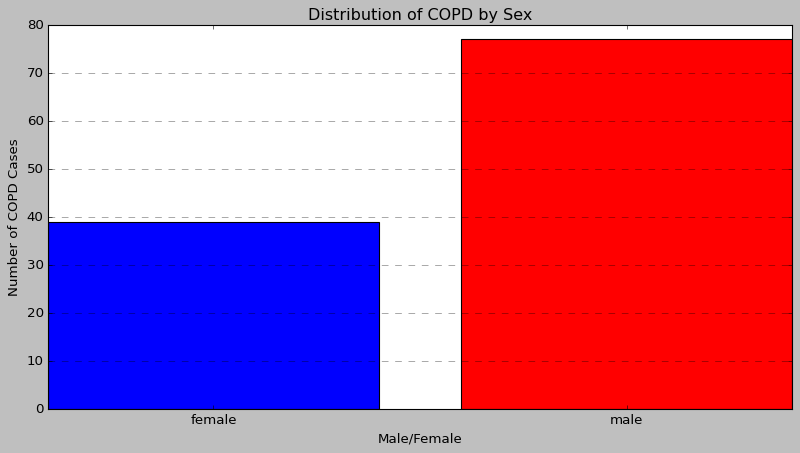

In [ ]:
# Count COPD occurences grouped by Sex
copd_counts_by_male_female = merged_copd_dataset2_cleaned.groupby('Male/Female')['copd'].sum()

# Plot a simple histogram 
plt.figure(figsize=(12,6))
plt.bar(copd_counts_by_male_female.index, copd_counts_by_male_female.values, color=['blue', 'red'], edgecolor='black')

# Axis Titles
plt.xlabel("Male/Female")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD by Sex")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [ ]:
# If the percentage is high, heart disease and COPD might be connected.
merged_copd_dataset2_cleaned.groupby('IHD')['copd'].describe()

,count,mean,std,min,25%,50%,75%,max
IHD,,,,,,,,
0,48,2,1,1,2,2,3,4
1,7,2,1,1,2,2,2,3


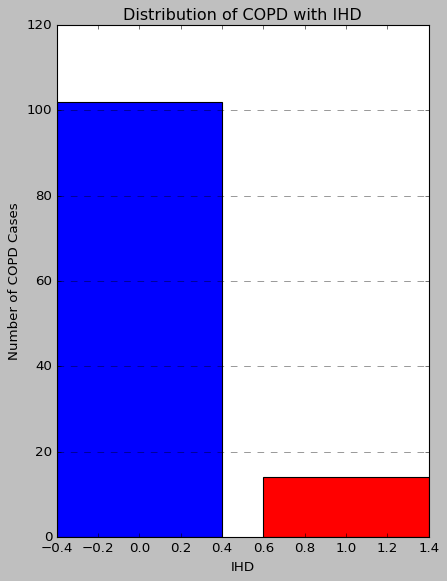

In [ ]:
# Count COPD occurences grouped with IHD
copd_counts_by_IHD = merged_copd_dataset2_cleaned.groupby('IHD')['copd'].sum()

# Plot a simple histogram 
plt.figure(figsize=(6,8))
plt.bar(copd_counts_by_IHD.index, copd_counts_by_IHD.values, color=['blue', 'red'], edgecolor='black')

# Axis Titles
plt.xlabel("IHD")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD with IHD")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

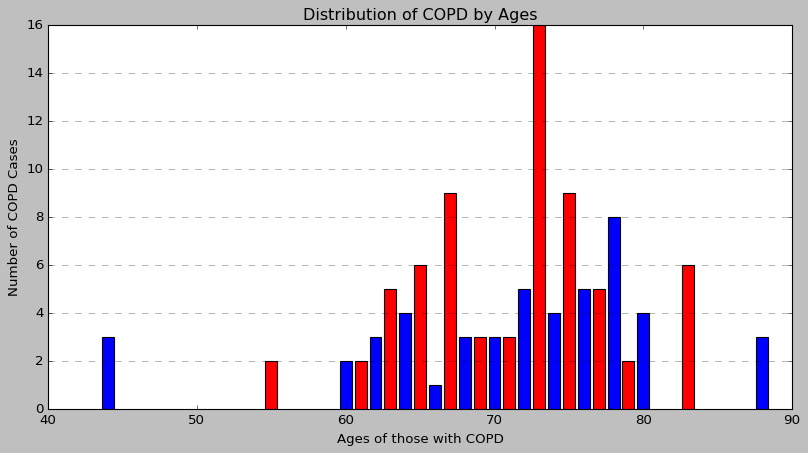

In [ ]:
# Count COPD occurences grouped by Ages
Ages_counts_by_ages = merged_copd_dataset2_cleaned.groupby('Ages')['copd'].sum()

# Plot a simple histogram 
plt.figure(figsize=(12,6))
plt.bar(Ages_counts_by_ages.index, Ages_counts_by_ages.values, color=['blue', 'red'], edgecolor='black')

# Axis Titles
plt.xlabel("Ages of those with COPD")
plt.ylabel("Number of COPD Cases")
plt.title("Distribution of COPD by Ages")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

<Axes: xlabel='copd'>

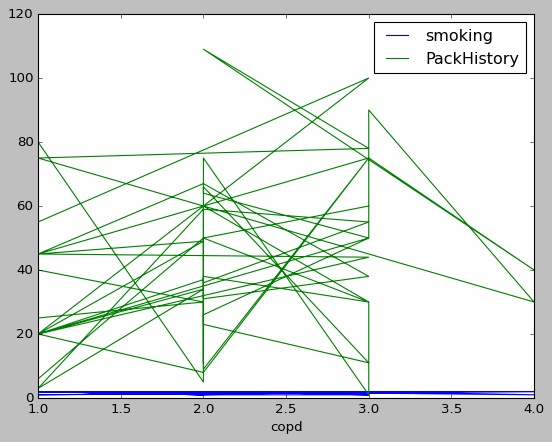

In [ ]:
# Plot the columns.
merged_copd_dataset2_cleaned.plot(x='copd', y=['smoking' ,'PackHistory'], kind='line')
